# KMeans
The KMeans class in the sklearn.cluster module of scikit-learn is a popular implementation of the K-Means clustering algorithm, which is used for partitioning data into 𝑘 distinct clusters based on similarity. Below is a breakdown of the key parameters, methods, and attributes:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [29]:
class KMeans:
    def __init__(self,k=5,max_iters=100,plot_steps=False):
        self.k=k
        self.max_iters=max_iters
        self.plot_steps=plot_steps
        # list of samples imdices for each cluster
        self.clusters=[[] for _ in range(self.k)]
        # the centers(mean vector) for each cluster
        self.centroid=[]

    def predict(self,X):
        self.X=X
        self.n_samples,self.n_features=X.shape
        random_sample_idxs=np.random.choice(self.n_samples,self.k,replace=False)
        self.centroids=[self.X[idx] for idx in random_sample_idxs]
        for i in range(self.max_iters):
            self.clusters=self.create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()
                print(i)
                
            centroids_old=self.centroids
            self.centroids=self._get_centroids(self.clusters)
            if self._is_converged(centroids_old,self.centroids):
                break

            if self.plot_steps:
                self.plot()
                print(i)
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self,clusters):
        labels=np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels

    def create_clusters(self,centroids):
        clusters=[[] for _ in range(self.k)]
        for idx,sample in enumerate(self.X):
            centroid_idx=self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self,sample,centroids):
        distances=[euclidean_distance(sample,point) for point in centroids]
        closest_idx=np.argmin(distances)
        return closest_idx

    def _get_centroids(self,clusters):
        centroids=np.zeros((self.k,self.n_features))
        for cluster_idx,cluster in enumerate(clusters):
            cluster_mean=np.mean(self.X[cluster],axis=0)
            centroids[cluster_idx]=cluster_mean
        return centroids

    def _is_converged(self,centroids_old,centroids):
        distances=[euclidean_distance(centroids_old[i],centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def plot(self):
        fig,ax=plt.subplots(figsize=(12,8))
        for i,index in enumerate(self.clusters):
            point=self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point,marker="x",color="black",linewidth=2)
        plt.show()

In [26]:
from sklearn.datasets import make_blobs
X,y=make_blobs(
    centers=5,n_samples=500,n_features=2,shuffle=True,random_state=101
)
print(X.shape)

(500, 2)


In [27]:
clusters=len(np.unique(y))
print(clusters)

5


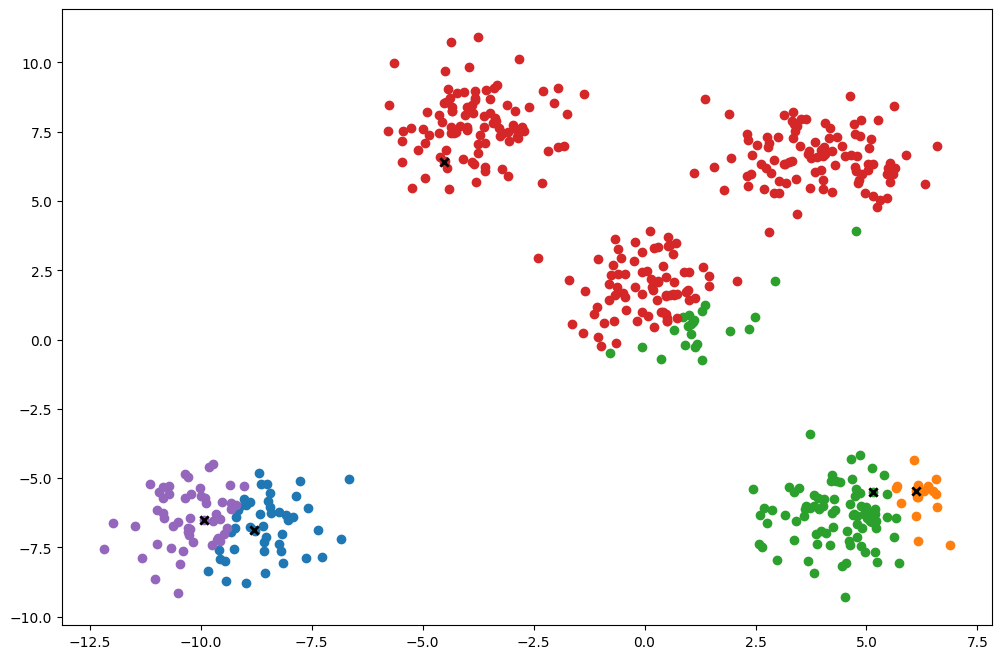

0


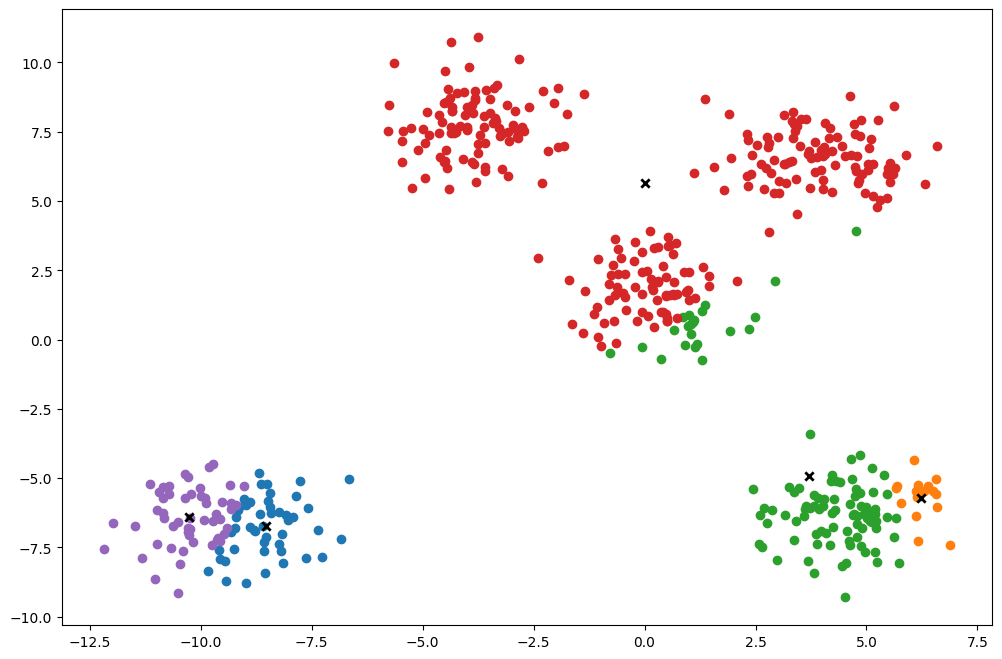

0


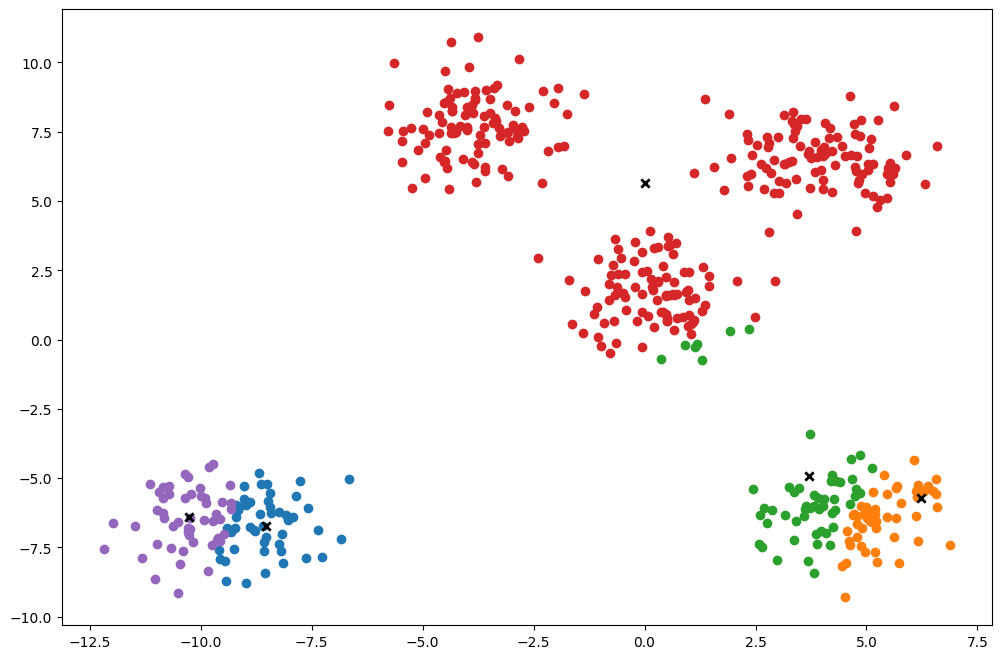

1


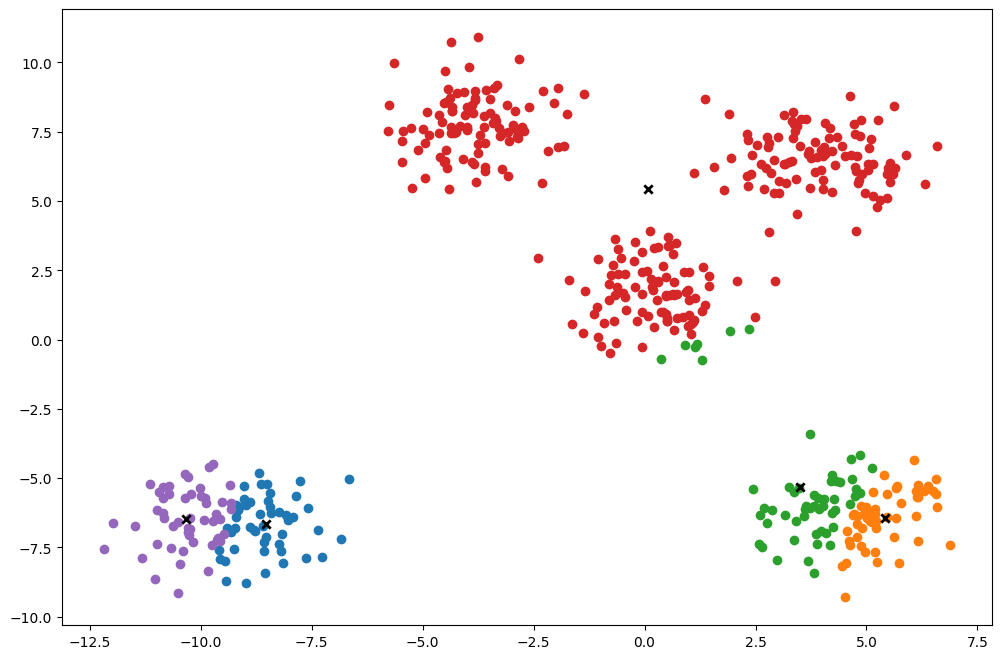

1


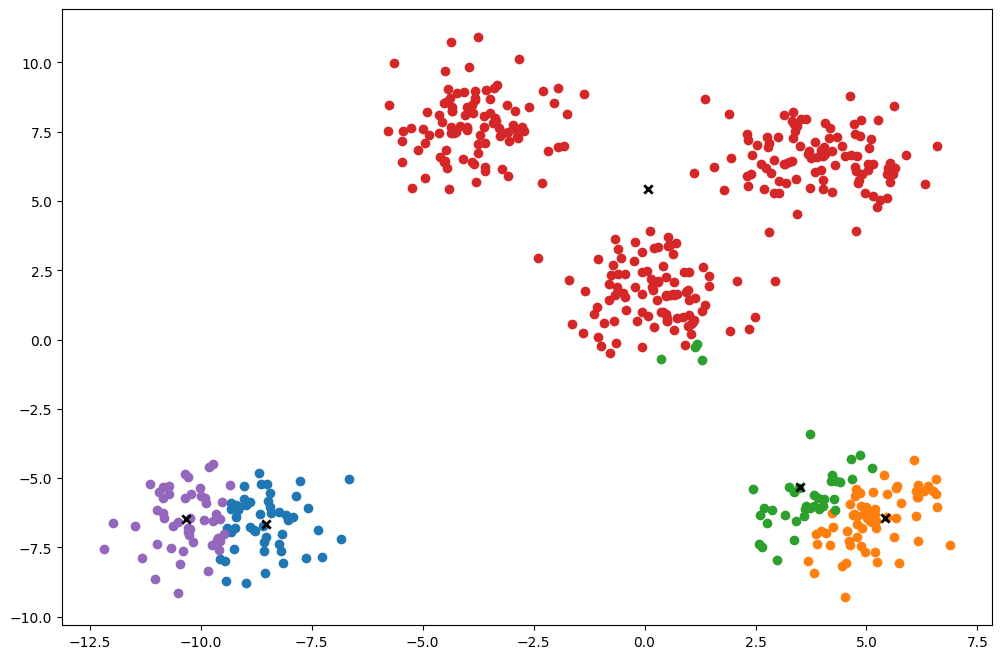

2


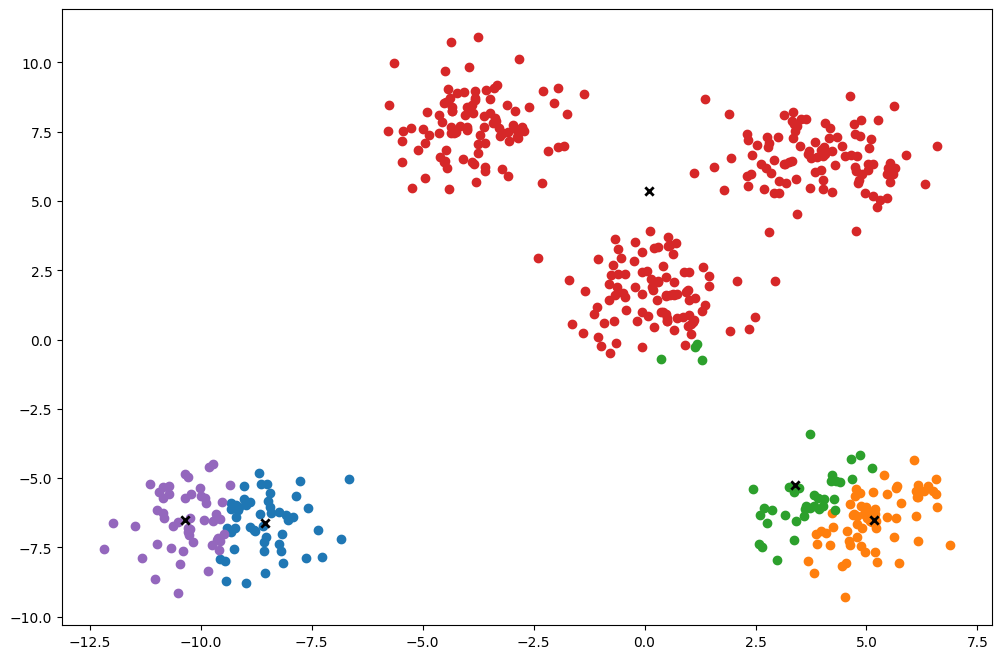

2


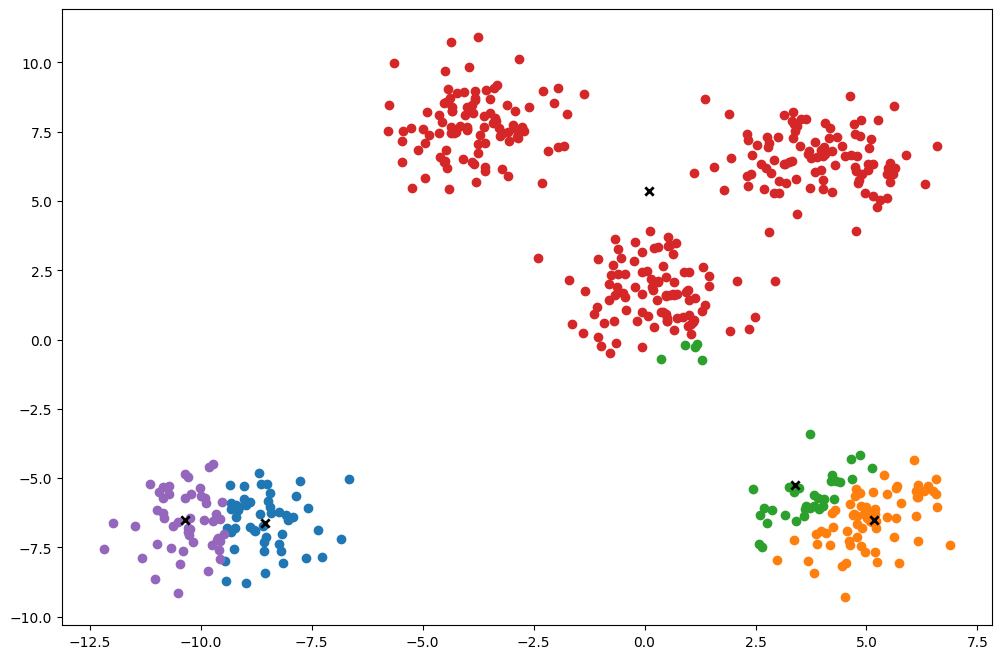

3


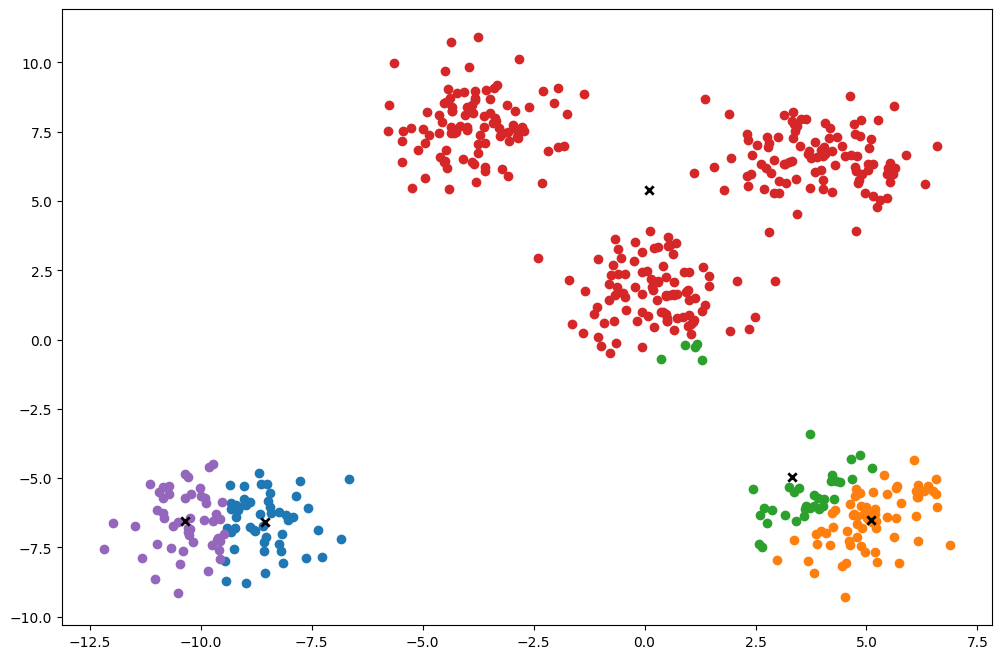

3


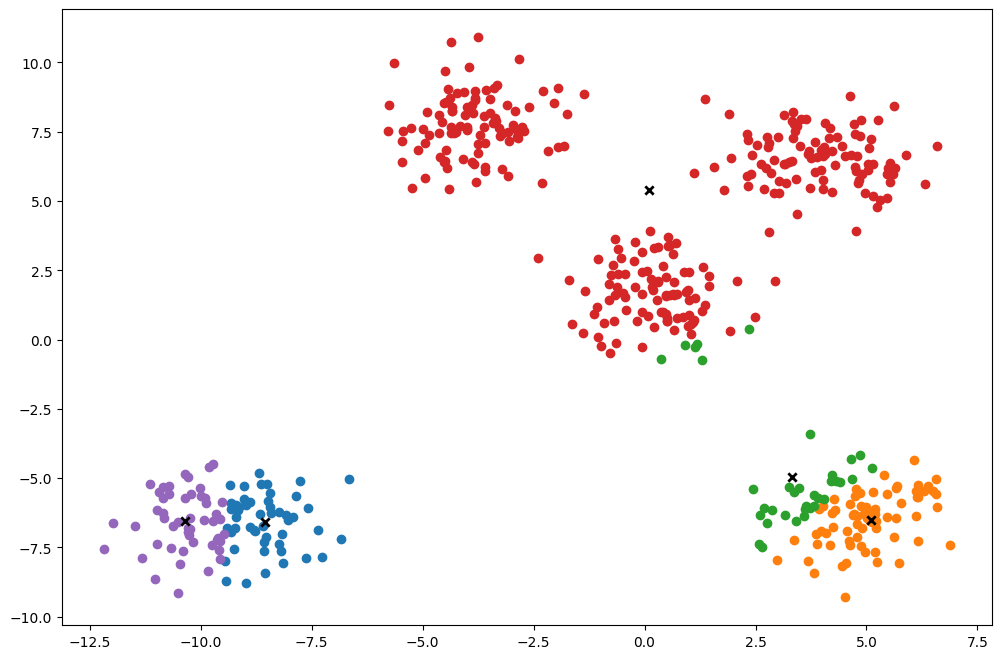

4


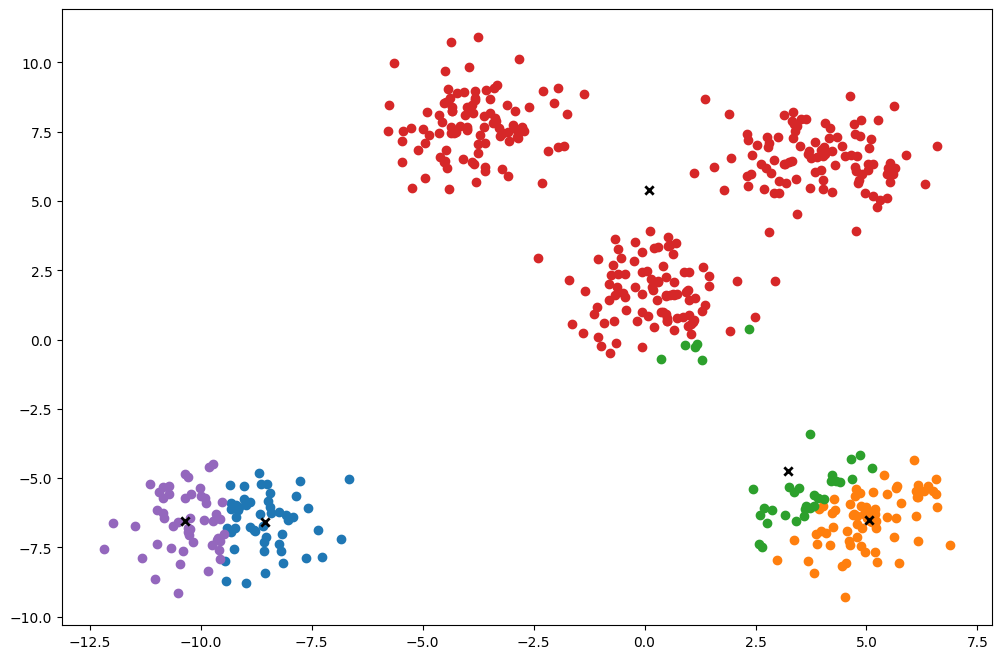

4


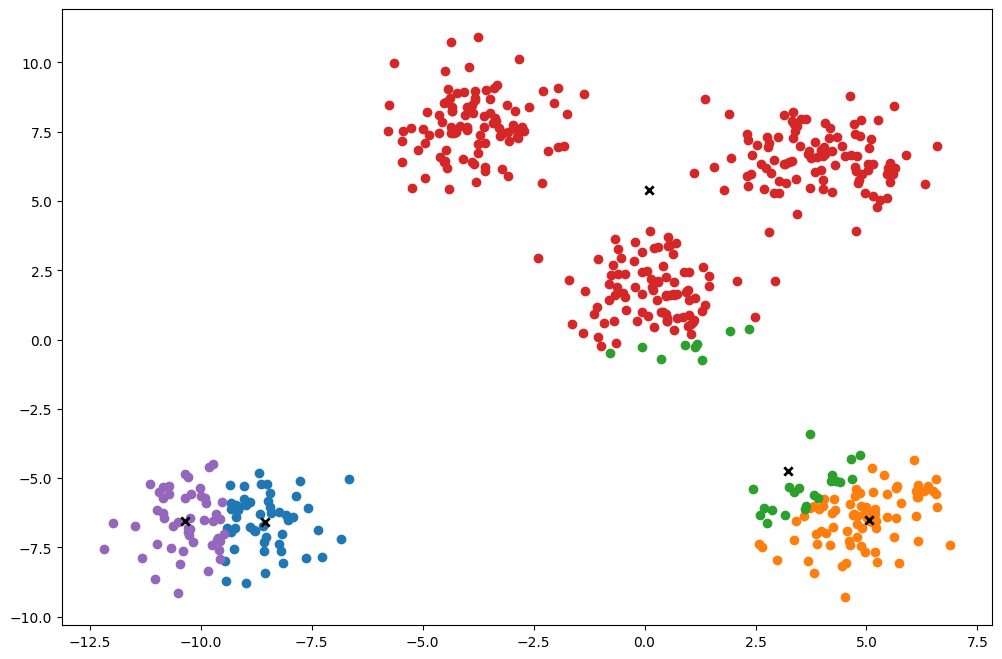

5


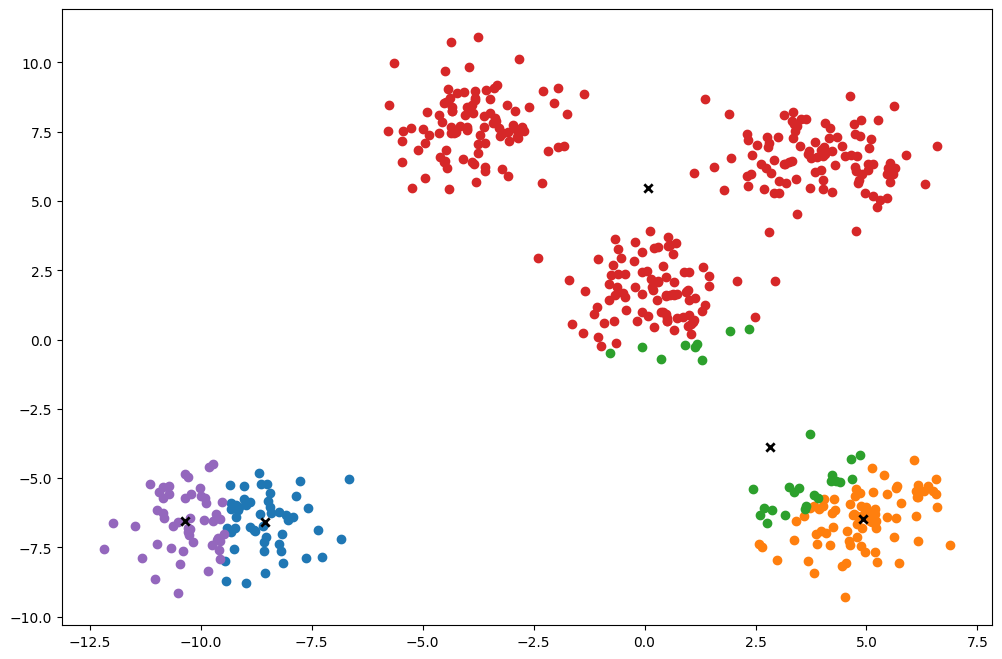

5


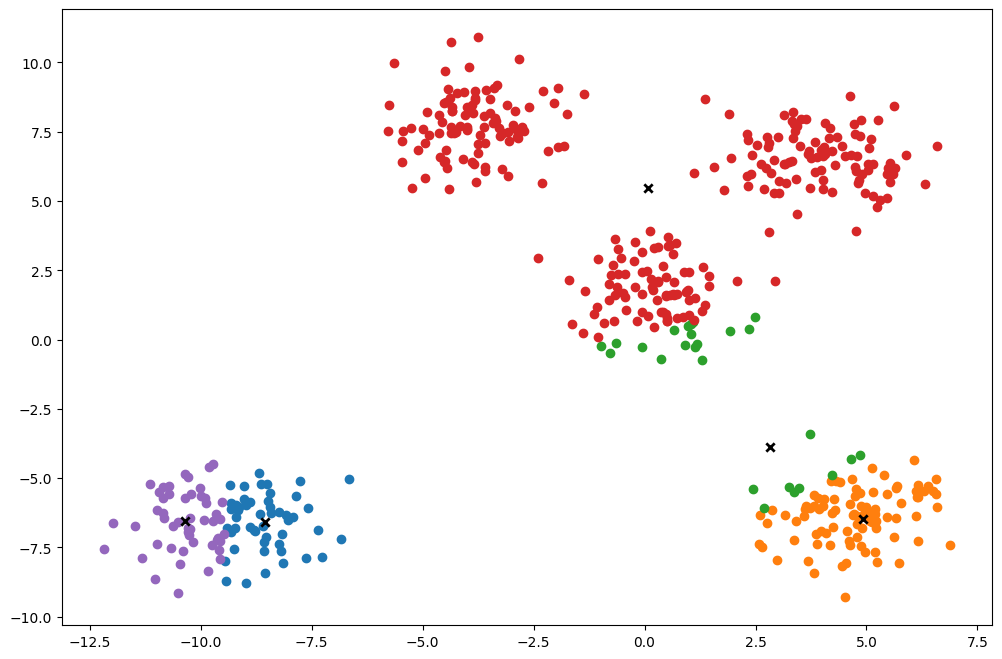

6


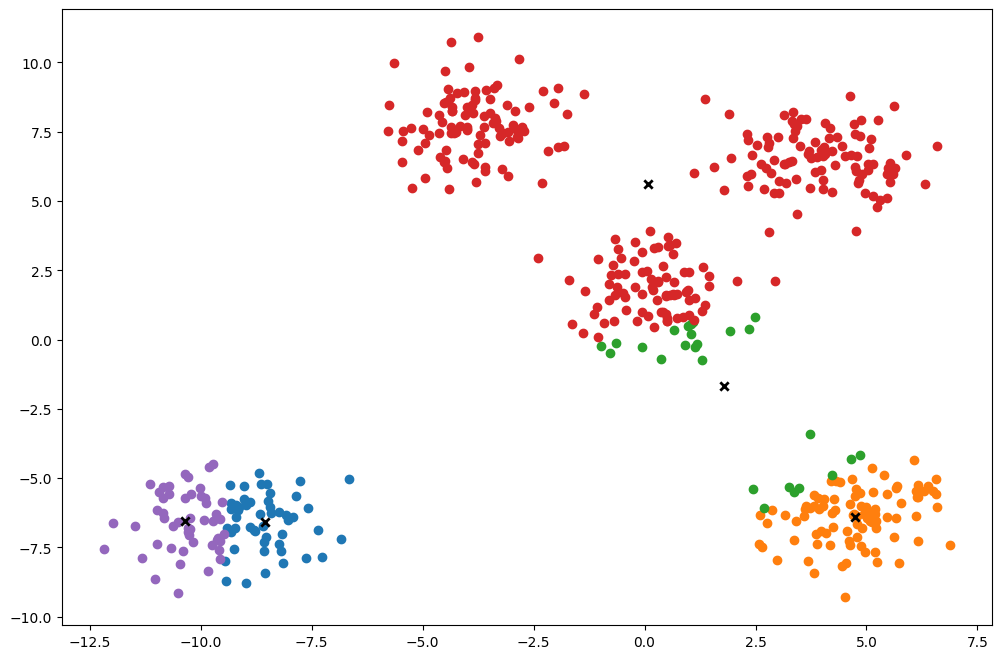

6


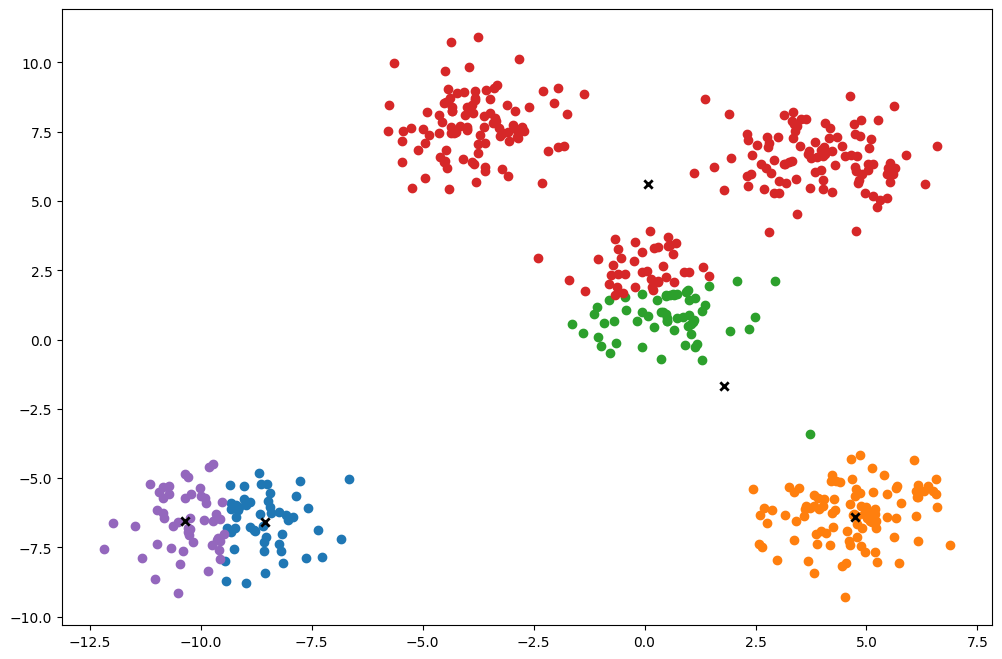

7


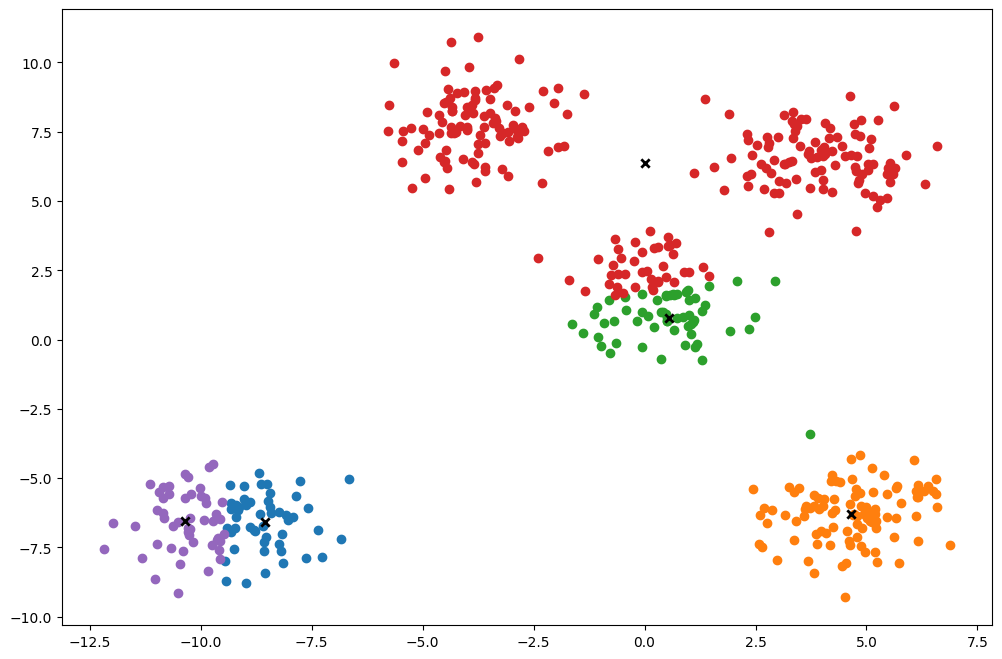

7


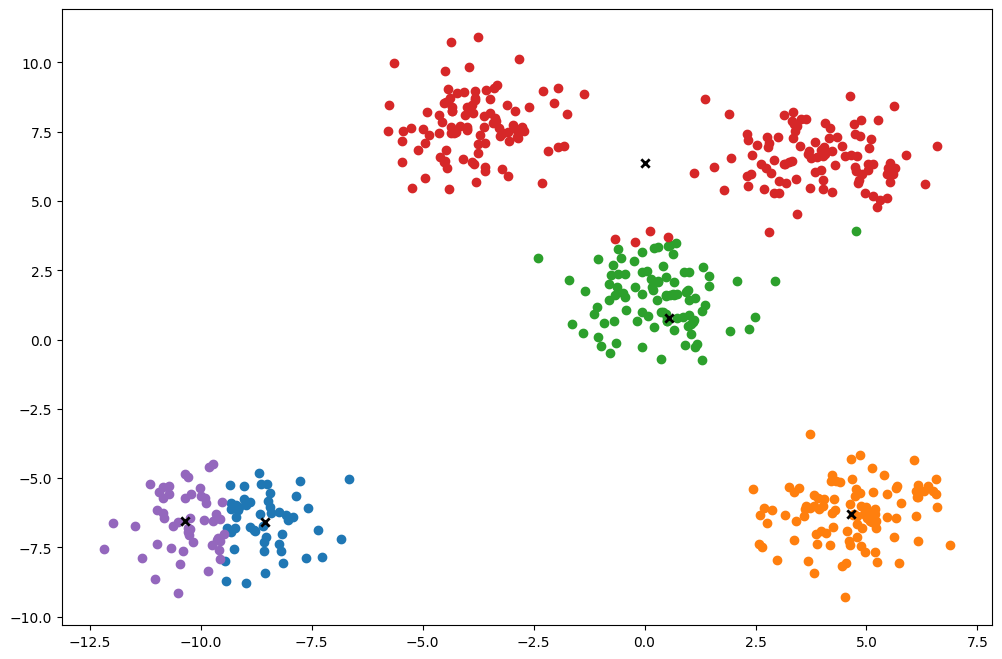

8


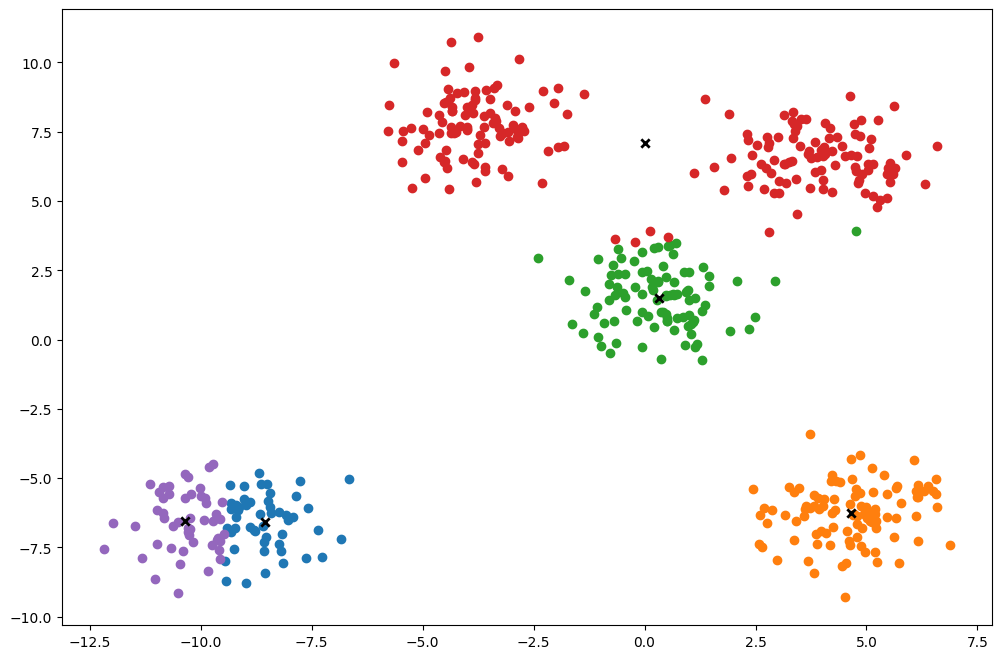

8


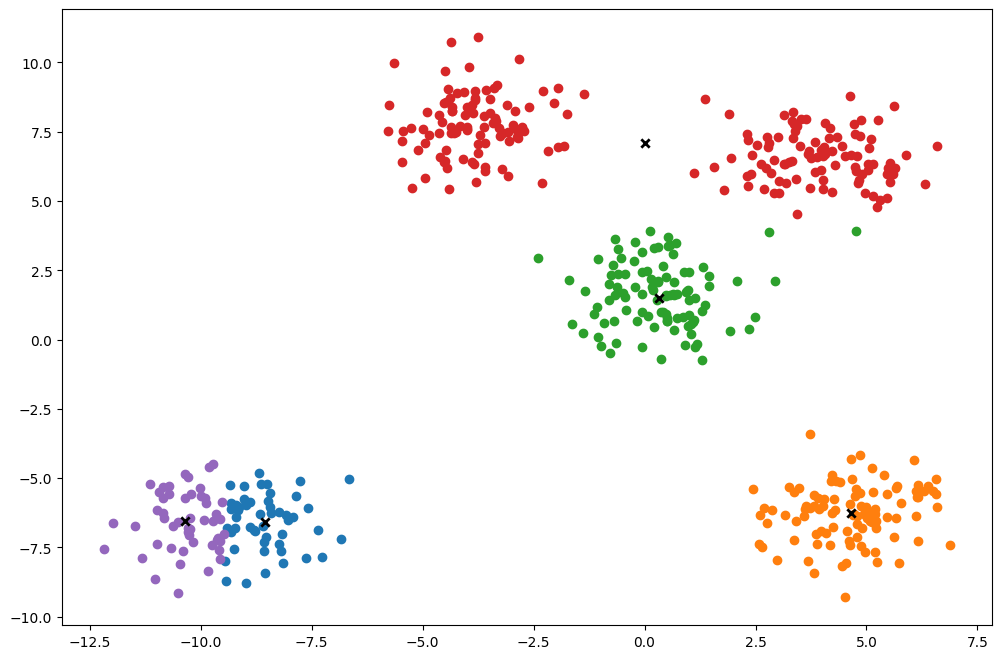

9


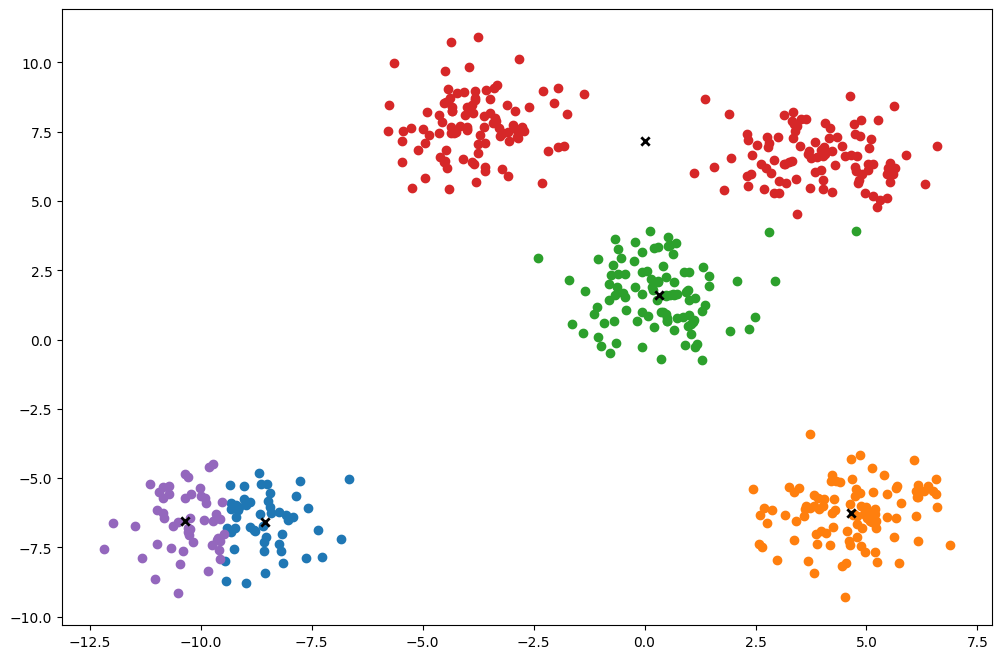

9


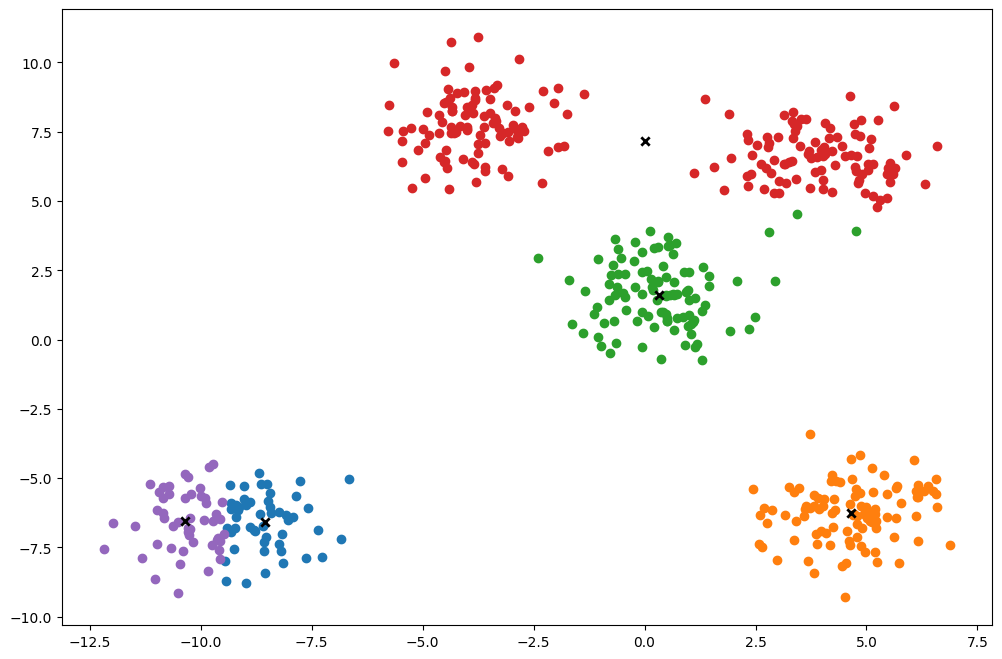

10


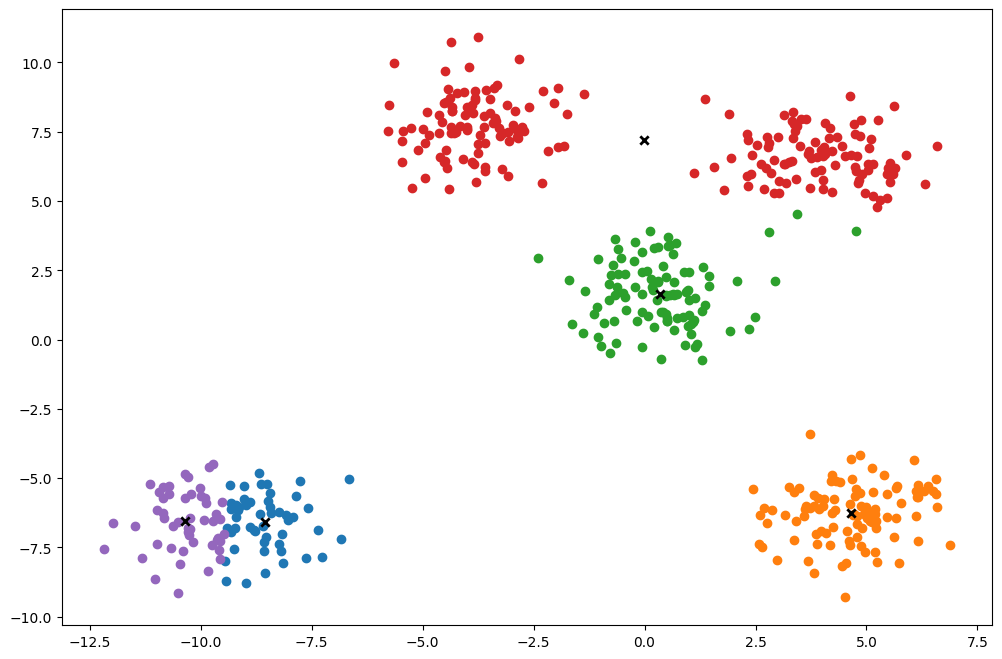

10


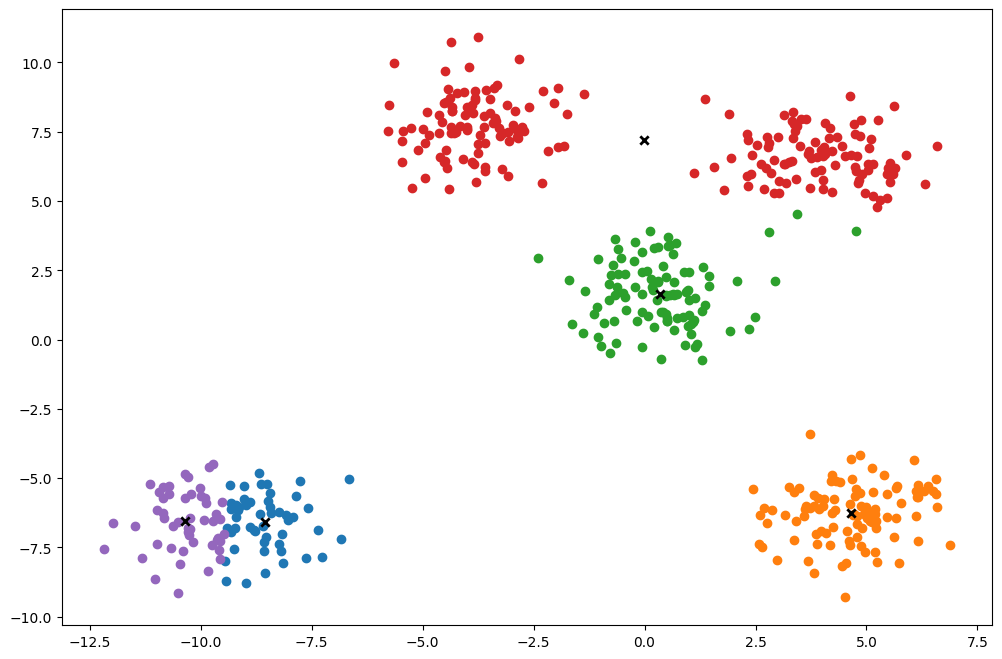

11


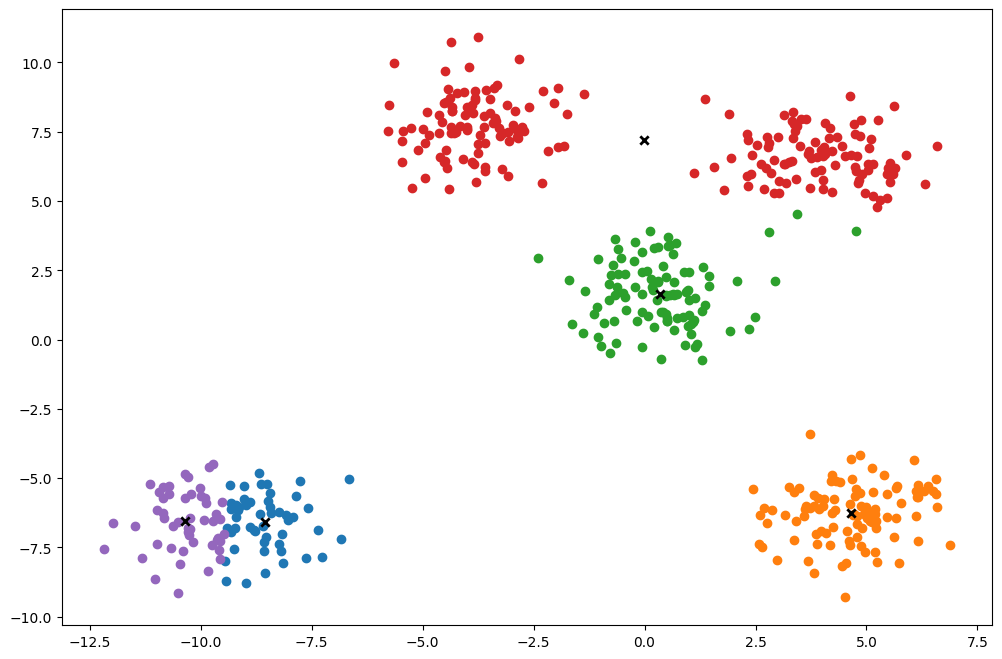

In [32]:
k=KMeans(k=clusters,max_iters=150,plot_steps=True)
y_pred=k.predict(X)
k.plot()

## Key Parameters:
- n_clusters (int, default=8):<br>
Defines the number of clusters to be formed.

- init (str, callable, array-like, default='k-means++'):<br>
Specifies the initialization method for the centroids. Options include:<br>
'k-means++': Smart initialization to speed up convergence.<br>
'random': Randomly selects initial cluster centroids.<br>
callable or array-like: Allows custom initialization.

- n_init (int or 'auto', default='auto'):<br>
Number of times the algorithm is run with different centroid seeds. The result with the lowest inertia is used.

- max_iter (int, default=300):<br>
Maximum number of iterations for a single run.

- tol (float, default=1e-4):<br>
Convergence criteria based on the Frobenius norm of the centroid shifts.

- random_state (int, default=None):<br>
Seed for random number generation, useful for reproducibility.

- algorithm (str, default='lloyd'):<br>
Algorithm to use for the K-Means algorithm.<br>
'lloyd': Traditional K-Means (Expectation-Maximization style).<br>
'elkan': An optimized version using the triangle inequality, more efficient for certain datasets.

## Attributes:
- cluster_centers_ (ndarray):<br>
The final centroid coordinates of the clusters.

- labels_ (ndarray):<br>
Cluster labels for each sample.

- inertia_ (float):<br>
The sum of squared distances between samples and their closest cluster center (within-cluster sum of squares).

- n_iter_ (int):<br>
Number of iterations run by the algorithm.

## Common Methods:
- fit(X, y=None, sample_weight=None)<br>
This method computes the K-Means clustering on the input data 𝑋.

- fit_predict(X, y=None, sample_weight=None)<br>
Combines fit and predict, where it computes the clusters and returns the labels for each sample.

- predict(X)<br>
Predicts the closest cluster for each sample in 𝑋 based on the already computed cluster centers.

- fit_transform(X, y=None, sample_weight=None)<br>
Computes the clustering and returns the distances from each sample to each cluster center.

- get_params() and set_params():<br>
These methods allow getting and setting the parameters for the KMeans estimator.

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=41, n_init="auto").fit(X)
z=kmeans.labels_
z

array([2, 2, 4, 4, 0, 2, 4, 1, 2, 2, 4, 0, 0, 2, 0, 0, 4, 4, 4, 2, 4, 3,
       0, 3, 0, 1, 3, 3, 1, 1, 4, 4, 4, 3, 4, 0, 2, 1, 2, 1, 0, 3, 0, 0,
       2, 1, 4, 3, 0, 0, 4, 3, 3, 3, 3, 1, 0, 1, 1, 1, 0, 0, 1, 3, 0, 4,
       0, 2, 3, 4, 4, 2, 3, 1, 3, 3, 1, 1, 1, 4, 0, 3, 0, 3, 2, 3, 0, 1,
       3, 2, 1, 3, 2, 4, 0, 4, 4, 3, 0, 2, 3, 4, 0, 0, 4, 1, 2, 3, 2, 1,
       0, 0, 2, 3, 0, 3, 1, 1, 3, 3, 2, 4, 2, 0, 0, 0, 4, 4, 1, 3, 4, 1,
       1, 4, 3, 3, 0, 0, 2, 3, 3, 0, 2, 3, 0, 4, 2, 3, 4, 2, 3, 0, 1, 3,
       2, 3, 2, 1, 1, 3, 1, 0, 4, 3, 3, 1, 1, 0, 2, 0, 0, 4, 1, 1, 4, 3,
       0, 1, 4, 0, 3, 3, 2, 1, 2, 4, 2, 0, 3, 0, 2, 0, 0, 4, 4, 1, 4, 1,
       0, 4, 0, 0, 0, 2, 3, 4, 1, 0, 0, 1, 2, 3, 4, 2, 3, 3, 1, 1, 3, 3,
       1, 1, 0, 4, 2, 4, 4, 2, 2, 1, 1, 4, 0, 4, 1, 3, 0, 1, 1, 3, 4, 3,
       4, 4, 0, 4, 2, 2, 2, 4, 4, 2, 3, 0, 0, 2, 4, 3, 0, 3, 2, 4, 0, 4,
       3, 3, 4, 3, 1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 4, 0, 2, 0, 2, 2, 1, 4,
       4, 2, 0, 3, 0, 0, 3, 3, 0, 2, 2, 2, 4, 4, 3,

In [38]:
print(kmeans.predict([[0, 0], [12, 3]]))
print(kmeans.cluster_centers_)

[4 3]
[[-3.81222587  7.75606791]
 [ 4.6497515  -6.25312567]
 [-9.44302162 -6.5596307 ]
 [ 3.89604178  6.53341535]
 [ 0.25812161  1.56886054]]


## Example:
- from sklearn.cluster import KMeans<br>
import numpy as np

- Sample data<br>
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

- Initialize KMeans with 2 clusters<br>
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

- Cluster labels<br>
print(kmeans.labels_)

- Output: array([1, 1, 1, 0, 0, 0])

- Predict cluster for new data points<br>
print(kmeans.predict([[0, 0], [12, 3]]))

- Output: array([1, 0])

- Coordinates of the cluster centers<br>
print(kmeans.cluster_centers_)

- Output: array([[10.,  2.], [ 1.,  2.]])

## Important Considerations:
- Inertia and Convergence:<br>
Inertia measures how well the clustering has been done, and KMeans tries to minimize this. However, the algorithm can get stuck in local minima, so running it multiple times (n_init > 1) is recommended.

- Choosing k (n_clusters):<br>
Methods such as the elbow method or silhouette analysis help in determining the optimal number of clusters.

- Algorithm Complexity:<br>
The K-Means algorithm is generally efficient but can have higher complexity on large datasets or high-dimensional data.

This implementation of KMeans in scikit-learn offers flexibility with several options for initialization, iterations, and optimization techniques, making it versatile for clustering tasks in various fields, including image processing, text analysis, and more.